# **Full Training on ResNet50 model**

In [2]:
import numpy as np
from keras.models import Model
from keras.preprocessing.image import image
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.resnet50 import ResNet50
import keras
modelrestnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
output = modelrestnet.layers[-1].output
output = keras.layers.Flatten()(output)
modelrestnet = Model(modelrestnet.input, output=output)
for layer in modelrestnet.layers:
    layer.trainable = True


from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
model = Sequential()
model.add(modelrestnet)
model.add(Dense(512, activation='relu', input_dim=(224,224,3)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='softmax'))
#opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 7s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fl...)`
  if sys.path[0] == '':


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 100352)            23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               51380736  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 75,231,617
Trainable params: 75,178,497
Non-trainable params: 53,120
_____________________________________

In [0]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import keras
import tensorflow
import PIL
import glob
import numpy as np
import pandas as pd
import os
import shutil 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

excel_sheet=pd.read_csv('ML_Features_1144.csv')

required_dftrain=excel_sheet[['sr_no','image_name','classification']]
# full training of resnet50
#resize the images to 224*224*3
X_incfull = [ ] # creating an empty array
i=0
loca=[]
for img_name in required_dftrain.image_name:
    
      frame_name=''+img_name
      loca.append(i)
      i=i+1
      img = plt.imread((frame_name+'.jpg').strip())
      X_incfull.append(img)  # storing each image in array X
    # except:
    #     i=i+1
        #continue
X_incfull = np.array(X_incfull)    # converting list to array
print(X_incfull)


#dummy_yresnet = np_utils.to_categorical(y_resnet)

image_incfull = []
for i in range(0,X_incfull.shape[0]):
    a_incfull = resize(X_incfull[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image_incfull.append(a_incfull)
X_incfull = np.array(image_incfull)










y_incfull = required_dftrain.classification
ydash=[]
locat=np.array(loca)
for j in locat:
    try: 
        ydash.append(y_incfull[j])
    except:
        continue
    
        
np.array(ydash)

[[[[247 229 241]
   [232 214 226]
   [214 196 208]
   ...
   [233 219 232]
   [227 213 226]
   [217 203 216]]

  [[211 195 206]
   [209 193 204]
   [209 193 204]
   ...
   [230 216 229]
   [234 220 233]
   [236 222 235]]

  [[215 202 212]
   [220 207 217]
   [230 217 227]
   ...
   [224 210 223]
   [227 213 226]
   [235 221 234]]

  ...

  [[ 81  36  79]
   [ 92  50  90]
   [ 78  40  77]
   ...
   [213 178 202]
   [200 161 188]
   [204 164 191]]

  [[ 73  28  69]
   [ 88  46  84]
   [ 83  46  80]
   ...
   [214 175 202]
   [206 166 193]
   [218 175 203]]

  [[146 104 142]
   [135  93 131]
   [120  83 117]
   ...
   [227 188 215]
   [228 188 215]
   [248 205 233]]]


 [[[189  77 101]
   [193  79 104]
   [201  84 110]
   ...
   [245 245 245]
   [245 245 245]
   [245 245 245]]

  [[191  79 103]
   [193  81 105]
   [196  82 107]
   ...
   [245 245 245]
   [245 245 245]
   [245 245 245]]

  [[191  82 105]
   [192  80 104]
   [192  80 104]
   ...
   [245 245 245]
   [245 245 245]
   [245 245

array(['Non-Tumor', 'Non-Tumor', 'Non-Tumor', ..., 'Non-Tumor',
       'Non-Tumor', 'Non-Tumor'], dtype='<U9')

In [18]:
len(X_incfull)

1144

In [0]:
from sklearn.model_selection import train_test_split
X_trainincfull, X_validincfull, y_trainincfull, y_validincfull = train_test_split(X_incfull, y_incfull, test_size=0.3, random_state=42)    # preparing the validation set

train_imgs_scaled = X_trainincfull.astype('float32')
validation_imgs_scaled  = X_validincfull.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

batch_size = 30
num_classes = 2
epochs = 30
input_shape = (224,224, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_trainincfull)
train_labels_enc = le.transform(y_trainincfull)
validation_labels_enc = le.transform(y_validincfull)

In [20]:
np.random.seed(1337)
#image augmentation
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(X_trainincfull, train_labels_enc, batch_size=12)
val_generator = val_datagen.flow(X_validincfull, validation_labels_enc, batch_size=12)
history = model.fit_generator(train_generator, 
                              steps_per_epoch=10, 
                              epochs=35,
                              validation_data=val_generator, 
                              validation_steps=20, 
                              verbose=1)

Epoch 1/35
10/10 [==============================] - 144s 14s/step - loss: 0.7750 - accuracy: 0.2250 - val_loss: 0.8333 - val_accuracy: 0.3375
Epoch 2/35
10/10 [==============================] - 128s 13s/step - loss: 0.7424 - accuracy: 0.2500 - val_loss: 0.6667 - val_accuracy: 0.2839
Epoch 3/35
10/10 [==============================] - 130s 13s/step - loss: 0.7500 - accuracy: 0.2500 - val_loss: 0.4167 - val_accuracy: 0.3390
Epoch 4/35
10/10 [==============================] - 131s 13s/step - loss: 0.6167 - accuracy: 0.3833 - val_loss: 0.8333 - val_accuracy: 0.2833
Epoch 5/35
10/10 [==============================] - 130s 13s/step - loss: 0.6583 - accuracy: 0.3417 - val_loss: 0.5833 - val_accuracy: 0.3475
Epoch 6/35
10/10 [==============================] - 129s 13s/step - loss: 0.6917 - accuracy: 0.3083 - val_loss: 0.7500 - val_accuracy: 0.2712
Epoch 7/35
10/10 [==============================] - 131s 13s/step - loss: 0.6583 - accuracy: 0.3417 - val_loss: 0.5000 - val_accuracy: 0.2958
Epoch 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


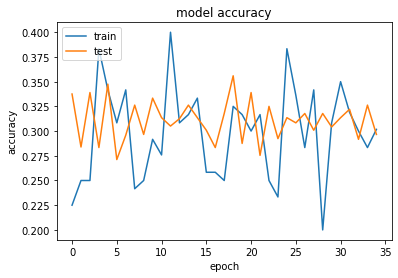

In [22]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

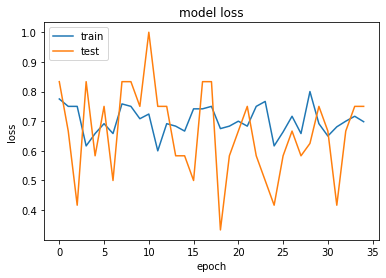

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()